In [1]:
# Import Libraries
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read excel file
data = pd.read_excel ("C:/Users/DIMO/Desktop/Recession Data/SystemRiskModel130822 (1).xlsx")

In [3]:
data.head()

,Unnamed: 0,Time,Country Name,Inflation,Unemployment,External debt stocks,Goods imports,Imports of goods and services,Net primary income,Portfolio investment,...,Interest rate spread,"External debt stocks, short-term","External debt stocks, long-term",Price level ratio of PPP conversion factor,Net lending (+) / net borrowing (-),"GDP, PPP",GDP per capita,GDP growth,GDP,Recession
0,6917,2016,Albania,-0.367317,15.420000,8.516223e+09,3.670526e+09,5.441411e+09,1.931374e+08,2.455002e+08,...,5.903333,1.646817e+09,6.482322e+09,0.341428,-2.530862,3.473997e+10,4124.055390,3.314981,1.186120e+10,0
1,1863,1997,Albania,33.180274,16.875999,5.164770e+08,5.706000e+08,6.858125e+08,4.960000e+07,0.000000e+00,...,5.432500,4.778341e+07,4.137197e+08,0.263971,-12.665230,8.555908e+09,717.380048,-10.919984,2.258514e+09,0
2,1597,1996,Albania,12.725478,13.931000,4.919944e+08,9.220000e+08,1.111400e+09,7.180000e+07,0.000000e+00,...,7.175000,3.158908e+07,4.061928e+08,0.338876,-10.551581,9.441925e+09,1009.977275,9.099999,3.199641e+09,0
3,4523,2007,Albania,2.932682,15.970000,2.966604e+09,3.419700e+09,5.344137e+09,2.973200e+08,-2.581000e+07,...,8.440524,5.106668e+08,2.292459e+09,0.493597,NaN,2.163165e+10,3595.038057,5.983260,1.067732e+10,1
4,7715,2019,Albania,1.411091,11.470000,9.556856e+09,4.532093e+09,6.925815e+09,-2.016453e+08,1.547042e+08,...,5.783333,6.072160e+08,8.501932e+09,0.385460,-1.435885,3.995703e+10,5396.215864,2.088063,1.540183e+10,0


In [4]:
# Carring on Exploratory Analysis
data.shape

(968, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  968 non-null    int64  
 1   Time                                        968 non-null    int64  
 2   Country Name                                968 non-null    object 
 3   Inflation                                   968 non-null    float64
 4   Unemployment                                968 non-null    float64
 5   External debt stocks                        968 non-null    float64
 6   Goods imports                               968 non-null    float64
 7   Imports of goods and services               968 non-null    float64
 8   Net primary income                          968 non-null    float64
 9   Portfolio investment                        968 non-null    float64
 10  Imports of goo

In [6]:
data.isna().sum().sort_values(ascending = False)

Net lending (+) / net borrowing (-)           15
Interest rate spread                           4
Short-term debt                                1
Unnamed: 0                                     0
Time                                           0
GDP                                            0
GDP growth                                     0
GDP per capita                                 0
GDP, PPP                                       0
Price level ratio of PPP conversion factor     0
External debt stocks, long-term                0
External debt stocks, short-term               0
Net financial flows, multilateral              0
Exports of goods and services                  0
Imports of goods and services.1                0
Portfolio investment                           0
Net primary income                             0
Imports of goods and services                  0
Goods imports                                  0
External debt stocks                           0
Unemployment        

In [7]:
data.drop('Unnamed: 0',inplace = True, axis =1)

In [8]:
# Droping Missing values
df = data.dropna()
df

,Time,Country Name,Inflation,Unemployment,External debt stocks,Goods imports,Imports of goods and services,Net primary income,Portfolio investment,Imports of goods and services.1,...,Interest rate spread,"External debt stocks, short-term","External debt stocks, long-term",Price level ratio of PPP conversion factor,Net lending (+) / net borrowing (-),"GDP, PPP",GDP per capita,GDP growth,GDP,Recession
0,2016,Albania,-0.367317,15.420000,8.516223e+09,3.670526e+09,5.441411e+09,1.931374e+08,2.455002e+08,5.436221e+09,...,5.903333,1.646817e+09,6.482322e+09,0.341428,-2.530862,3.473997e+10,4124.055390,3.314981,1.186120e+10,0
1,1997,Albania,33.180274,16.875999,5.164770e+08,5.706000e+08,6.858125e+08,4.960000e+07,0.000000e+00,7.956390e+08,...,5.432500,4.778341e+07,4.137197e+08,0.263971,-12.665230,8.555908e+09,717.380048,-10.919984,2.258514e+09,0
2,1996,Albania,12.725478,13.931000,4.919944e+08,9.220000e+08,1.111400e+09,7.180000e+07,0.000000e+00,1.064684e+09,...,7.175000,3.158908e+07,4.061928e+08,0.338876,-10.551581,9.441925e+09,1009.977275,9.099999,3.199641e+09,0
4,2019,Albania,1.411091,11.470000,9.556856e+09,4.532093e+09,6.925815e+09,-2.016453e+08,1.547042e+08,6.926962e+09,...,5.783333,6.072160e+08,8.501932e+09,0.385460,-1.435885,3.995703e+10,5396.215864,2.088063,1.540183e+10,0
5,2011,Albania,3.429123,13.480000,6.484194e+09,4.460790e+09,6.709055e+09,3.115975e+06,-9.404323e+07,6.700237e+09,...,6.570346,1.091790e+09,5.275163e+09,0.434683,-3.900934,2.965556e+10,4437.142612,2.545406,1.289076e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2020,Zambia,15.732585,12.848000,3.004589e+10,4.786846e+09,5.836255e+09,-5.106907e+08,-1.944055e+08,5.892352e+09,...,0.763240,6.774802e+08,2.869007e+10,0.284940,-13.127095,6.355937e+10,985.132436,-2.785055,1.811063e+10,0
964,2017,Zimbabwe,0.893962,4.785000,1.251036e+10,5.090624e+09,6.221303e+09,-3.875526e+08,1.008818e+08,5.340673e+09,...,3.640000,3.725806e+09,8.302364e+09,0.511243,-11.767167,3.439633e+10,1235.189032,4.709492,1.758489e+10,0
965,2016,Zimbabwe,-1.543670,4.788000,1.146494e+10,4.925507e+09,6.189300e+09,-3.953052e+08,8.006134e+07,6.426700e+09,...,3.022500,3.141269e+09,7.868501e+09,0.521862,-8.558721,3.937571e+10,1464.588957,0.755869,2.054868e+10,0
966,2018,Zimbabwe,10.618866,4.796000,1.262012e+10,6.616035e+09,7.642202e+09,-3.112690e+08,-5.473016e+07,7.499340e+09,...,4.599167,3.383750e+09,8.765478e+09,0.490709,-6.832475,3.691706e+10,1254.642265,4.824211,1.811554e+10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 967
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time                                        948 non-null    int64  
 1   Country Name                                948 non-null    object 
 2   Inflation                                   948 non-null    float64
 3   Unemployment                                948 non-null    float64
 4   External debt stocks                        948 non-null    float64
 5   Goods imports                               948 non-null    float64
 6   Imports of goods and services               948 non-null    float64
 7   Net primary income                          948 non-null    float64
 8   Portfolio investment                        948 non-null    float64
 9   Imports of goods and services.1             948 non-null    float64
 10  Exports of goo

<AxesSubplot:xlabel='Recession', ylabel='count'>

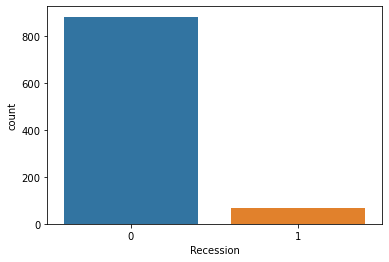

In [10]:
#Cheaking the distribution of the Recession Class
sns.countplot(x = df['Recession'])

In [11]:
df['Recession'].value_counts()

0    881
1     67
Name: Recession, dtype: int64

In [12]:
# Dealing with categorical Data
le =LabelEncoder()
df['Country Name'] = le.fit_transform(df['Country Name'])

C:\Users\DIMO\AppData\Local\Temp/ipykernel_2124/1369428887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country Name'] = le.fit_transform(df['Country Name'])


In [13]:
df.head()

,Time,Country Name,Inflation,Unemployment,External debt stocks,Goods imports,Imports of goods and services,Net primary income,Portfolio investment,Imports of goods and services.1,...,Interest rate spread,"External debt stocks, short-term","External debt stocks, long-term",Price level ratio of PPP conversion factor,Net lending (+) / net borrowing (-),"GDP, PPP",GDP per capita,GDP growth,GDP,Recession
0,2016,0,-0.367317,15.420000,8.516223e+09,3.670526e+09,5.441411e+09,1.931374e+08,2.455002e+08,5.436221e+09,...,5.903333,1.646817e+09,6.482322e+09,0.341428,-2.530862,3.473997e+10,4124.055390,3.314981,1.186120e+10,0
1,1997,0,33.180274,16.875999,5.164770e+08,5.706000e+08,6.858125e+08,4.960000e+07,0.000000e+00,7.956390e+08,...,5.432500,4.778341e+07,4.137197e+08,0.263971,-12.665230,8.555908e+09,717.380048,-10.919984,2.258514e+09,0
2,1996,0,12.725478,13.931000,4.919944e+08,9.220000e+08,1.111400e+09,7.180000e+07,0.000000e+00,1.064684e+09,...,7.175000,3.158908e+07,4.061928e+08,0.338876,-10.551581,9.441925e+09,1009.977275,9.099999,3.199641e+09,0
4,2019,0,1.411091,11.470000,9.556856e+09,4.532093e+09,6.925815e+09,-2.016453e+08,1.547042e+08,6.926962e+09,...,5.783333,6.072160e+08,8.501932e+09,0.385460,-1.435885,3.995703e+10,5396.215864,2.088063,1.540183e+10,0
5,2011,0,3.429123,13.480000,6.484194e+09,4.460790e+09,6.709055e+09,3.115975e+06,-9.404323e+07,6.700237e+09,...,6.570346,1.091790e+09,5.275163e+09,0.434683,-3.900934,2.965556e+10,4437.142612,2.545406,1.289076e+10,1


In [14]:
# Checking for duplicates
df.duplicated().sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,948.0,2.009051e+03,7.765815e+00,1.991000e+03,2.004000e+03,2.010000e+03,2.015000e+03,2.020000e+03
Country Name,948.0,2.685338e+01,1.631749e+01,0.000000e+00,1.300000e+01,2.700000e+01,4.000000e+01,5.700000e+01
Inflation,948.0,1.000195e+01,2.492955e+01,-3.749145e+00,3.207114e+00,5.606996e+00,9.259618e+00,4.095302e+02
Unemployment,948.0,8.370584e+00,6.753851e+00,2.500000e-01,3.881750e+00,6.318500e+00,1.056350e+01,3.725000e+01
External debt stocks,948.0,5.020749e+10,9.982835e+10,4.894549e+07,4.517934e+09,1.283798e+10,4.279652e+10,6.685131e+11
Goods imports,948.0,3.174703e+10,6.362777e+10,7.622515e+07,3.445690e+09,8.155372e+09,2.860898e+10,4.648499e+11
Imports of goods and services,948.0,3.942928e+10,7.677490e+10,1.147093e+08,4.574166e+09,9.830910e+09,3.565735e+10,5.048187e+11
Net primary income,948.0,-3.773772e+09,9.693633e+09,-7.960435e+10,-2.325816e+09,-5.329463e+08,-1.068183e+08,5.276245e+09
Portfolio investment,948.0,-9.348534e+08,6.374266e+09,-6.691297e+10,-5.647672e+08,-3.216500e+05,6.225252e+07,3.994338e+10
Imports of goods and services.1,948.0,3.994065e+10,7.772843e+10,1.248584e+08,4.808045e+09,1.011729e+10,3.522899e+10,5.048770e+11


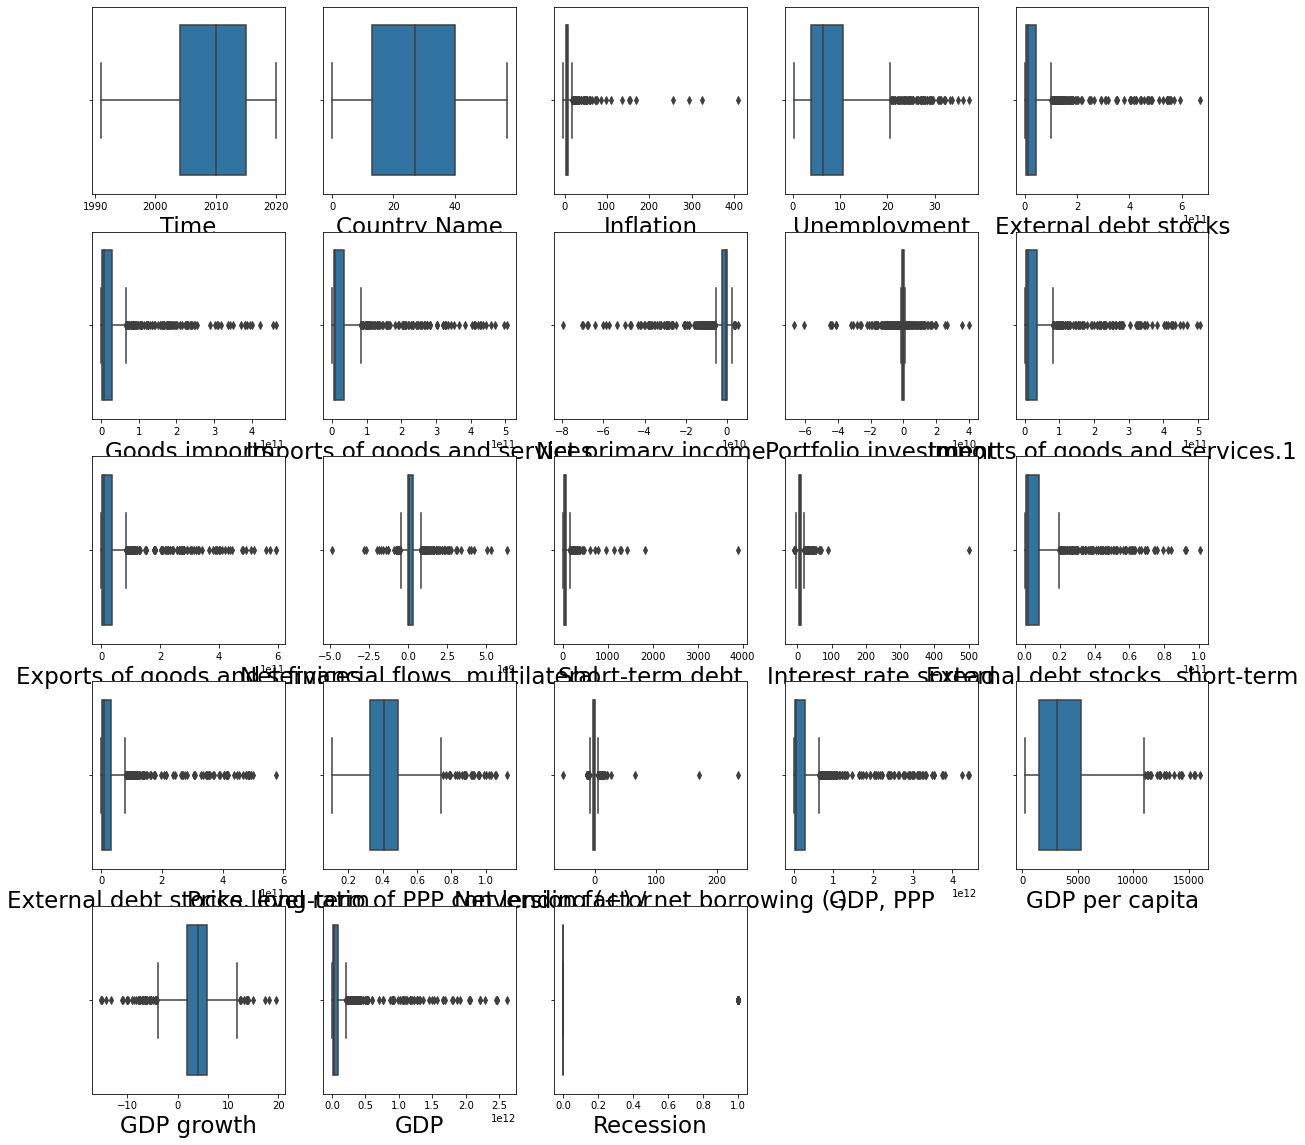

In [16]:
# Checking for outliers
plt.figure(figsize = (20, 20))
for i in range (len(df.columns)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x = df.iloc[:, i])
    plt.xlabel(df.columns[i], size = 23) 

<AxesSubplot:>

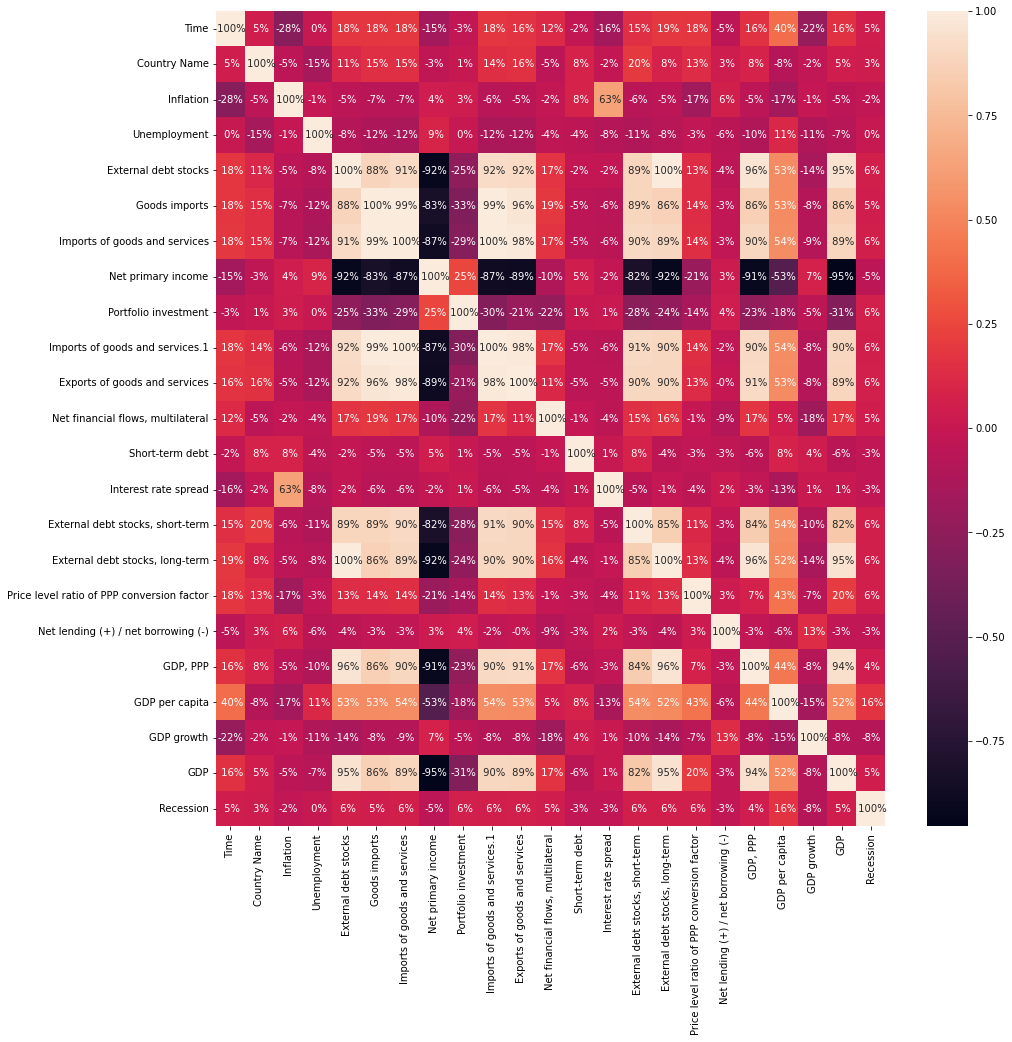

In [17]:
# Checking for correlation
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(),annot=True, fmt=' .0%')

In [18]:
df.columns

Index(['Time', 'Country Name', 'Inflation', 'Unemployment',
       'External debt stocks', 'Goods imports',
       'Imports of goods and services', 'Net primary income',
       'Portfolio investment', 'Imports of goods and services.1',
       'Exports of goods and services', 'Net financial flows, multilateral',
       'Short-term debt', 'Interest rate spread',
       'External debt stocks, short-term', 'External debt stocks, long-term',
       'Price level ratio of PPP conversion factor',
       'Net lending (+) / net borrowing (-)', 'GDP, PPP', 'GDP per capita',
       'GDP growth', 'GDP', 'Recession'],
      dtype='object')

In [19]:
# DATA SPLITING
# Train Test Split
from sklearn.model_selection import train_test_split


In [20]:
array = df.values
X = array[:,0:22]
Y = array[:,22]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [23]:
#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from numpy import set_printoptions

#feature extraction
model = DecisionTreeClassifier()
rfe = RFE(model,n_features_to_select = 7)
fit = rfe.fit(scaledX_train, Y_train)
#summarize scores and selected features
print("Num of Features:{}".format(fit.n_features_))
print("Selected Features:{}".format(fit.support_))
print("Feature Ranking:{}".format(fit.ranking_))

Num of Features:7
Selected Features:[ True  True  True False False False False False False  True False False
 False  True False False False False False  True  True False]
Feature Ranking:[ 1  1  1 13 11 12 15  2  3  1  5  4 10  1  8  9  7  6 16  1  1 14]


In [24]:
scaledX_train

array([[ 0.54709172,  1.65974375, -0.39763655, ...,  0.18334904,
        -0.919182  ,  0.17445564],
       [ 0.16012856,  1.10397033, -0.16076949, ...,  0.73080773,
        -0.75005449, -0.28923355],
       [ 1.06304261,  0.98046513, -0.08144947, ..., -1.02478908,
         0.05049374, -0.39079975],
       ...,
       [-1.38772411, -0.56334993, -0.14329048, ..., -0.67687834,
         0.30142953, -0.35916765],
       [ 0.67607945,  0.1159287 , -0.23960529, ...,  2.56789112,
        -0.22739921,  3.68255488],
       [ 1.06304261,  1.47448594, -0.36406055, ...,  1.03444616,
         0.10017365,  1.00359269]])

In [25]:
# Picking selected features
scaledX_train = pd.DataFrame(scaledX_train, columns =['Time', 'Country Name', 'Inflation', 'Unemployment',
       'External debt stocks', 'Goods imports',
       'Imports of goods and services', 'Net primary income',
       'Portfolio investment', 'Imports of goods and services.1',
       'Exports of goods and services', 'Net financial flows, multilateral',
       'Short-term debt', 'Interest rate spread',
       'External debt stocks, short-term', 'External debt stocks, long-term',
       'Price level ratio of PPP conversion factor',
       'Net lending (+) / net borrowing (-)', 'GDP, PPP', 'GDP per capita',
       'GDP growth', 'GDP'])
scaledX_train['Recession'] = Y_train
modelX_train = scaledX_train.iloc[:,[0,1,2,8,9,19,20]]

In [26]:
modelX_train

,Time,Country Name,Inflation,Portfolio investment,Imports of goods and services.1,GDP per capita,GDP growth
0,0.547092,1.659744,-0.397637,-1.295605,0.774330,0.183349,-0.919182
1,0.160129,1.103970,-0.160769,0.155772,-0.267724,0.730808,-0.750054
2,1.063043,0.980465,-0.081449,0.183917,-0.473246,-1.024789,0.050494
3,-1.645700,0.733455,0.039495,0.143609,-0.379763,-0.508424,-0.239931
4,-0.097847,0.115929,-0.198539,-2.732107,3.903418,2.245169,-0.648288
...,...,...,...,...,...,...,...
753,-0.742785,0.239434,-0.198391,0.163199,-0.499486,-1.069395,0.797536
754,0.289116,1.412733,0.082293,0.169655,-0.355473,-1.021556,0.962203
755,-1.387724,-0.563350,-0.143290,0.162497,-0.446456,-0.676878,0.301430
756,0.676079,0.115929,-0.239605,-7.328006,5.238689,2.567891,-0.227399


In [27]:
scaledX_train['Recession'].value_counts()

0.0    704
1.0     54
Name: Recession, dtype: int64

In [28]:
modelX_train.columns

Index(['Time', 'Country Name', 'Inflation', 'Portfolio investment',
       'Imports of goods and services.1', 'GDP per capita', 'GDP growth'],
      dtype='object')

In [31]:
# MODEL BUILDING
# Import model
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # For oversampling the Recession (1) Class

In [32]:
# SMOTE Technique for over sampling
oversample = SMOTE()
oSampleX, oSampleY = oversample.fit_resample(modelX_train, scaledX_train['Recession'])

C:\Users\DIMO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recession', ylabel='count'>

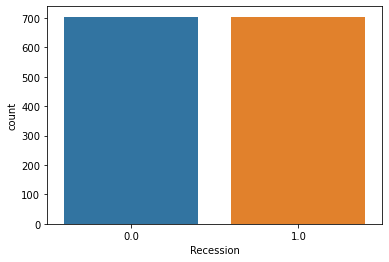

In [33]:
sns.countplot(oSampleY)

In [34]:
count = Counter(oSampleY)
print(count)

Counter({0.0: 704, 1.0: 704})


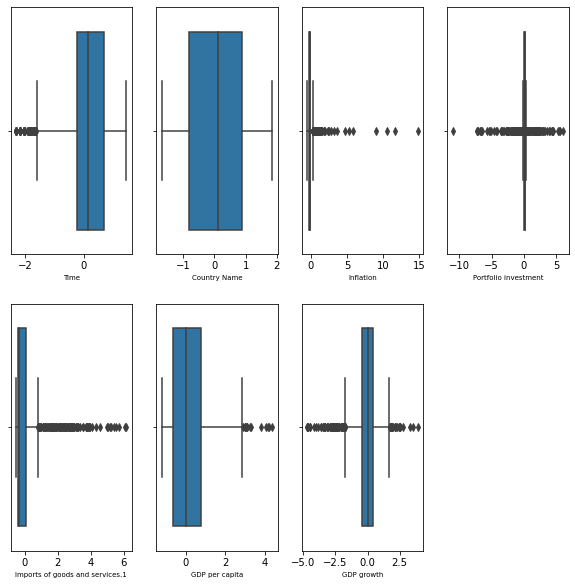

In [35]:
plt.figure(figsize = (10, 10))
for i in range (len(oSampleX.columns)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x = oSampleX.iloc[:, i])
    plt.xlabel(oSampleX.columns[i], size = 7) 

In [36]:
# Model Training
trainSet_X = oSampleX.values
trainSet_Y = oSampleY.values
nFold = 10

modelNames = []
results = []
models = []
errors = []

models.append(('LG', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=nFold)#, random_state=7)
    modelResults = cross_val_score(model, trainSet_X, trainSet_Y, cv=kfold, scoring=scoring)
    results.append(modelResults)
    modelNames.append(name)
    msg =  (name, modelResults.mean(), modelResults.std())
    print(msg)


('LG', 0.4693566362715299, 0.0789974823710849)
('DT', 0.8722289766970619, 0.0553884168725607)
('GB', 0.5970921985815603, 0.296906223642977)
('KNN', 0.8694630192502533, 0.09906290093896736)
('SVM', 0.7586676798378926, 0.08785551293501782)


In [37]:
# MODEL TESTING

In [38]:
X_test

array([[ 2.01800000e+03,  1.60000000e+01,  4.08147638e+00, ...,
         6.31741372e+03,  3.81235122e+00,  5.58137185e+09],
       [ 2.01900000e+03,  6.00000000e+00,  2.72582104e+00, ...,
         3.32286333e+03,  5.75516999e+00,  2.53565707e+09],
       [ 2.01700000e+03,  4.40000000e+01,  1.74989677e+00, ...,
         4.25897868e+03,  1.04243150e+00,  8.32025556e+08],
       ...,
       [ 2.00600000e+03,  2.20000000e+01,  6.25172467e+00, ...,
         2.51302873e+03,  8.09297494e+00,  1.50569298e+10],
       [ 2.01300000e+03,  3.00000000e+00,  2.41571745e+00, ...,
         7.87575695e+03,  5.80980084e+00,  7.41644359e+10],
       [ 2.00900000e+03,  2.10000000e+01,  9.59224599e+00, ...,
         4.33517841e+03, -4.34530186e+00,  1.21204609e+10]])

In [39]:
testDF = pd.DataFrame(X_test, columns =['Time', 'Country Name', 'Inflation', 'Unemployment',
       'External debt stocks', 'Goods imports',
       'Imports of goods and services', 'Net primary income',
       'Portfolio investment', 'Imports of goods and services.1',
       'Exports of goods and services', 'Net financial flows, multilateral',
       'Short-term debt', 'Interest rate spread',
       'External debt stocks, short-term', 'External debt stocks, long-term',
       'Price level ratio of PPP conversion factor',
       'Net lending (+) / net borrowing (-)', 'GDP, PPP', 'GDP per capita',
       'GDP growth', 'GDP'])

testDF['Recession'] = Y_test
testDF


,Time,Country Name,Inflation,Unemployment,External debt stocks,Goods imports,Imports of goods and services,Net primary income,Portfolio investment,Imports of goods and services.1,...,Interest rate spread,"External debt stocks, short-term","External debt stocks, long-term",Price level ratio of PPP conversion factor,Net lending (+) / net borrowing (-),"GDP, PPP",GDP per capita,GDP growth,GDP,Recession
0,2018.0,16.0,4.081476,4.333,1.245388e+09,2.362276e+09,3.093023e+09,-3.585242e+08,3.507438e+07,3.098985e+09,...,2.232448,4.455000e+07,1.107524e+09,0.445613,-4.365342,1.252515e+10,6317.413723,3.812351,5.581372e+09,1.0
1,2019.0,6.0,2.725821,2.502,2.703805e+09,1.010507e+09,1.229725e+09,-2.210689e+08,0.000000e+00,1.221922e+09,...,11.750000,2.777600e+07,2.667747e+09,0.268720,1.570091,9.436049e+09,3322.863329,5.755170,2.535657e+09,0.0
2,2017.0,44.0,1.749897,8.578,4.430755e+08,3.207213e+08,4.101821e+08,-2.161907e+07,8.211036e+06,3.924192e+08,...,6.155087,0.000000e+00,4.157165e+08,0.656631,-1.167815,1.267113e+09,4258.978675,1.042432,8.320256e+08,0.0
3,2001.0,7.0,1.589654,2.485,4.794042e+09,1.580000e+09,1.979444e+09,-2.113460e+08,2.301000e+07,2.056200e+09,...,10.238299,3.800000e+08,4.173328e+09,0.270890,-6.611523,3.005482e+10,948.870204,1.683799,8.141538e+09,0.0
4,2019.0,8.0,0.562782,15.690,1.323115e+10,1.038457e+10,1.115460e+10,-6.632064e+07,1.252758e+08,1.115604e+10,...,2.374335,3.592000e+08,1.247409e+10,0.389515,1.776031,5.186276e+10,6119.762351,2.831001,2.020132e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2015.0,11.0,-0.104633,9.140,4.037860e+10,2.721060e+10,3.209264e+10,-2.238700e+09,-6.651300e+08,3.194231e+10,...,6.834975,8.772782e+09,3.075930e+10,0.384662,-0.926949,1.320171e+11,7074.681023,3.428055,5.078200e+10,0.0
186,2019.0,16.0,1.773102,4.448,1.344061e+09,2.414329e+09,3.206096e+09,-4.516646e+08,-1.722682e+07,3.211587e+09,...,1.349818,5.295300e+07,1.198328e+09,0.433036,-3.686095,1.269239e+10,6175.890653,-0.445563,5.496265e+09,0.0
187,2006.0,22.0,6.251725,14.000,1.385678e+10,1.026034e+10,1.323100e+10,3.637375e+08,3.681241e+07,1.323103e+10,...,3.557500,6.600356e+09,7.072730e+09,0.291228,-3.640345,5.170148e+10,2513.028732,8.092975,1.505693e+10,0.0
188,2013.0,3.0,2.415717,4.970,1.057314e+10,1.117291e+10,1.949284e+10,-4.127528e+09,-7.185090e+08,1.947559e+10,...,8.318333,1.604885e+09,8.725803e+09,0.458187,4.877454,1.618649e+11,7875.756953,5.809801,7.416444e+10,0.0


In [51]:
modelX_test = testDF.iloc[:,[0,1,2,8,9,19,20]]

In [52]:
testset_x = modelX_test.values
testset_y = testDF['Recession'].values

In [53]:
# Testing of Trained Decision Tree model
test_model = models[1][1]
test_model.fit(trainSet_X,trainSet_Y)

DecisionTreeClassifier()

In [54]:
y_pred = test_model.predict(testset_x)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [55]:
testset_y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1.])

In [56]:
# CHECK MODEL ACCURACY
result = test_model.score(testset_x, testset_y)
print('Accuracy: {}'.format(result * 100))

Accuracy: 93.15789473684211
